In [5]:
import pandas as pd
df=pd.read_excel("/content/knn_2d_blobs.xlsx")
print(df.head())

         x1        x2  label
0 -5.730354 -7.583286      2
1  1.942992  1.918875      1
2  6.829682  1.164871      1
3 -2.901306  7.550771      0
4  5.841093  1.565094      1


In [6]:
#split into features(x) and labels (y)
X=df[["x1","x2"]] # features
y=df["label"] #target/labels

In [8]:
#split  into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)#42-random shuffle is repeatable

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) #we use five nearest points
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [11]:
y_pred=knn.predict(X_test_scaled)

In [12]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",round(acc,2))

Accuracy: 1.0


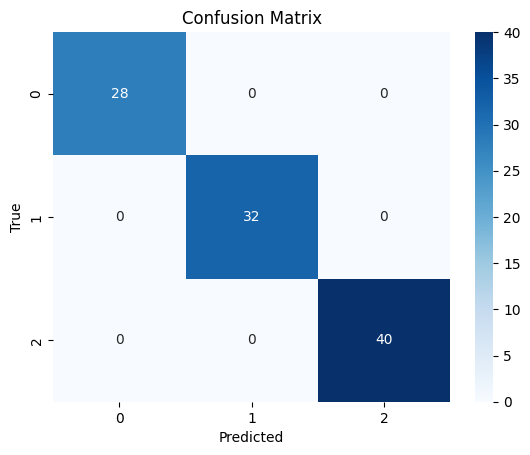

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
#print("Confusion Matrix:")
#print(cm)

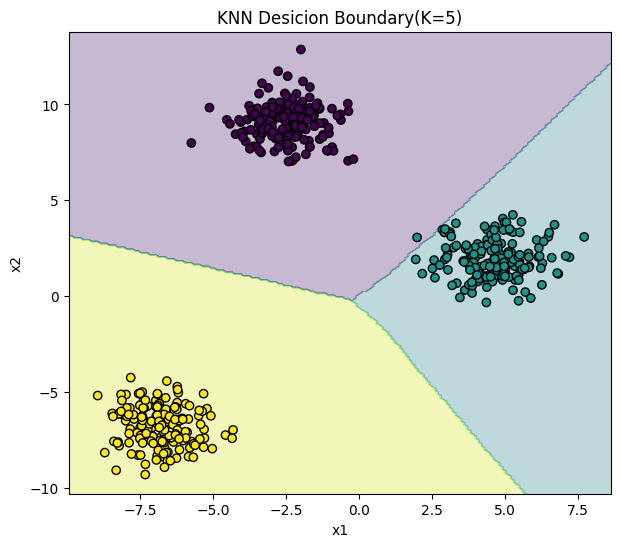

In [16]:
import numpy as np
x_min,x_max=X["x1"].min()-1,X["x1"].max()+1
y_min,y_max=X["x2"].min()-1,X["x2"].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx,yy,Z,alpha=0.3,cmap="viridis")
plt.scatter(X["x1"],X["x2"],c=y,cmap="viridis",edgecolor='k')
plt.title("KNN Desicion Boundary(K=5)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [17]:
#new data points
new_points=np.array([
    [0.5,-2],
    [-6,5],
    [4,6]
])

new_points_scaled=scaler.transform(new_points)

predicted_labels=knn.predict(new_points_scaled)
print("Predicted Labels:",predicted_labels)

Predicted Labels: [1 0 1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


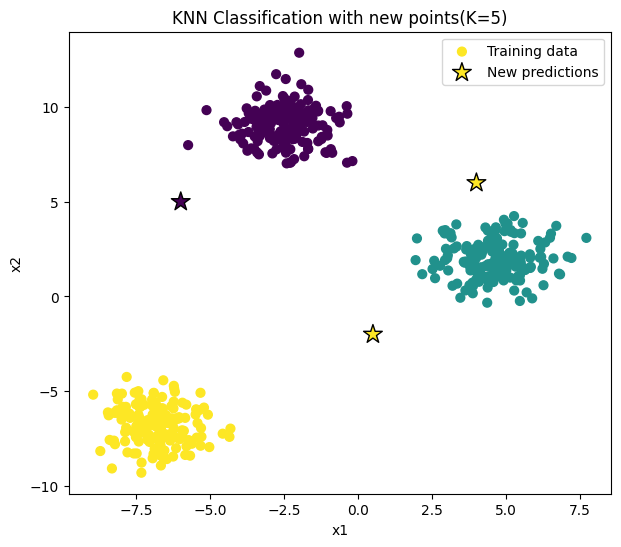

In [19]:
plt.figure(figsize=(7,6))
plt.scatter(X["x1"],X["x2"],c=y,cmap="viridis",s=40,label="Training data")
plt.scatter(new_points[:,0],new_points[:,1],c=predicted_labels,cmap="viridis",edgecolor="black",s=200,marker="*",label="New predictions")
plt.title("KNN Classification with new points(K=5)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()